In [1]:
%%capture
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename));

In [2]:
import numpy as np  
import pandas as pd   
import matplotlib.pyplot as plt
from PIL import Image


In [3]:
train_path = "/kaggle/input/datasets-lemlitbang-sibi-alphabets/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training/"


img_types = ['.jpg', '.png', '.jpeg']

In [4]:
# Put output into a scrollable box
from IPython.display import display, HTML

def create_scrollable_output(output, height='300px'):
    display(HTML(
        '<div style="max-height: {0}; overflow-y: auto;"><pre>{1}</pre></div>'.format(height, output)
    ))

In [5]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

def traverse_folders(path):
    output = ""
    for folder_name in sorted(os.listdir(path)):
        output += 'Folder name: ' + folder_name + "\n"
        
        img_data = []
        df = pd.DataFrame(columns=['path', 'width', 'height'])
        
        # * Don't forget .lower() !
        image_files = [file_name for file_name in sorted(os.listdir(os.path.join(path, folder_name))) 
                       if file_name.lower().endswith(tuple(img_types))]
        
        #print(image_files)
        
        for image_file in image_files:
            img_path=os.path.join(path, folder_name, image_file)
            with Image.open(img_path) as img:
                width, height = img.size
            img_data.append({'path': img_path, 'width': width, 'height': height})        

        df = pd.concat([df, pd.DataFrame(img_data)], ignore_index=True)
        

        #print(image_file,df['width'],df['height'])

        width_desc = df['width'].astype(int).describe()
        height_desc = df['height'].astype(int).describe()
        
        output += "Count: {}\n".format(int(width_desc['count']))
        output += "Width -  min: {}, max: {}\n".format(width_desc['min'], width_desc['max'])
        output += "Height -  min: {}, max: {}\n".format(height_desc['min'], height_desc['max'])
        output += '------------------\n'
    
    return output

scrollable_output = traverse_folders(train_path)
create_scrollable_output(scrollable_output)


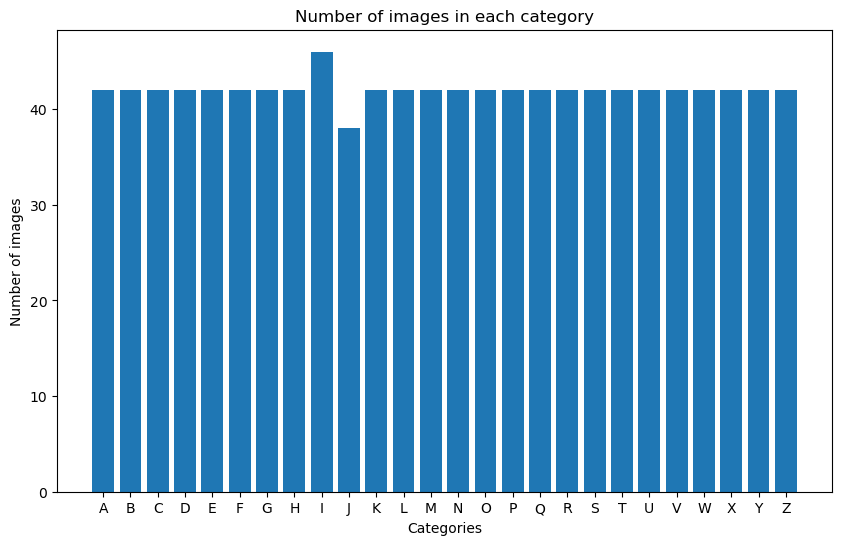

In [6]:
path=train_path
#path='/kaggle/working/val'


categories = sorted(os.listdir(path))

image_counts = [len([f for f in os.listdir(os.path.join(path, category)) 
                     if f.lower().endswith(tuple(img_types))]) for category in categories]

plt.figure(figsize=(10,6)) 
plt.bar(categories, image_counts)
plt.xlabel("Categories")
plt.ylabel("Number of images")
plt.title("Number of images in each category")
plt.show()


In [7]:
output_resized_train_path = "./kaggle/working/resized/resized_train"

def resize_images(image_dir, output_dir, size=(224, 224)):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir, exist_ok=True)
    
    
    for category in sorted(os.listdir(image_dir)):
        category_dir = os.path.join(image_dir, category)
        output_category_dir = os.path.join(output_dir, category)
        
        if not os.path.exists(output_category_dir):
            os.mkdir(output_category_dir)
            
        print('Begin to resize folder: ',category_dir)
        for image_name in os.listdir(category_dir):
            if image_name.lower().endswith(tuple(img_types)):
                image_path = os.path.join(category_dir, image_name)
                img = Image.open(image_path)
                # thumbnail v.s resize : https://stackoverflow.com/questions/29367990/what-is-the-difference-between-image-resize-and-image-thumbnail-in-pillow-python
                img.thumbnail(size, Image.LANCZOS)
                
                new_img = Image.new("RGB", size)  # create a new black image
                new_img.paste(img, ((size[0] - img.size[0]) // 2,
                                  (size[1] - img.size[1]) // 2))  # paste resized image into center of new image
                
                new_img.save(os.path.join(output_category_dir, image_name))
        print('Finished resize folder: ',category_dir)

resize_images(train_path, output_resized_train_path)


Begin to resize folder:  /kaggle/input/datasets-lemlitbang-sibi-alphabets/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training/A
Finished resize folder:  /kaggle/input/datasets-lemlitbang-sibi-alphabets/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training/A
Begin to resize folder:  /kaggle/input/datasets-lemlitbang-sibi-alphabets/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training/B
Finished resize folder:  /kaggle/input/datasets-lemlitbang-sibi-alphabets/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training/B
Begin to resize folder:  /kaggle/input/datasets-lemlitbang-sibi-alphabets/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training/C
Finished resize folder:  /kaggle/input/datasets-lemlitbang-sibi-alphabets/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V

In [8]:
from PIL import Image
import os

def get_min_max_size(path):

    folders = sorted([folder for folder in os.listdir(path)])

    min_width, min_height = float('inf'), float('inf')
    max_width, max_height = 0, 0

    for folder_name in folders:
        image_files = [file_name for file_name in os.listdir(os.path.join(path, folder_name)) 
                       if file_name.lower().endswith(tuple(img_types))]

        for image_file in image_files:
            with Image.open(os.path.join(path, folder_name, image_file)) as img:
                width, height = img.size

                min_width = min(min_width, width)
                min_height = min(min_height, height)
                max_width = max(max_width, width)
                max_height = max(max_height, height)

    print("Minimum width: ", min_width, "  Minimum height: ", min_height)
    print("Maximum width: ", max_width, "  Maximum height: ", max_height)
    
get_min_max_size(output_resized_train_path)

Minimum width:  224   Minimum height:  224
Maximum width:  224   Maximum height:  224


In [9]:
import shutil

def create_symlinks(source_dir, target_dir, file_names):
    os.makedirs(target_dir, exist_ok=True)
    for file_name in file_names:
        source_path = os.path.join(source_dir, file_name)
        target_path = os.path.join(target_dir, file_name)
        os.symlink(source_path, target_path)

def split_dataset(base_dir, train_target_dir, val_target_dir, val_ratio=0.2):
    # If target directories exist, remove them
    if os.path.exists(train_target_dir):
        shutil.rmtree(train_target_dir)
    if os.path.exists(val_target_dir):
        shutil.rmtree(val_target_dir)
        
    # Get the categories (A-Z)
    categories = os.listdir(base_dir)
    for category in categories:
        source_dir = os.path.join(base_dir, category)
        train_target_category_dir = os.path.join(train_target_dir, category)
        val_target_category_dir = os.path.join(val_target_dir, category)

        file_names = [f for f in os.listdir(source_dir) if f.lower().endswith(tuple(img_types))]
        np.random.shuffle(file_names)
        val_count = int(len(file_names) * val_ratio)
        val_file_names = file_names[:val_count]
        train_file_names = file_names[val_count:]

        create_symlinks(source_dir, train_target_category_dir, train_file_names)
        create_symlinks(source_dir, val_target_category_dir, val_file_names)
    print('Finished splitting dataset')

split_dataset(output_resized_train_path, '/kaggle/working/train', '/kaggle/working/val')


Finished splitting dataset


In [10]:
import os
import shutil
import numpy as np

# 原始图片文件夹路径
base_dir = output_resized_train_path 

# 创建训练和验证文件夹
train_dir = '/kaggle/working/train'
val_dir = '/kaggle/working/val'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

split_ratio = 0.8

# If target directories exist, remove them
if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
if os.path.exists(val_dir):
    shutil.rmtree(val_dir)
    
for category in os.listdir(base_dir):
    category_dir = os.path.join(base_dir, category)
    train_category_dir = os.path.join(train_dir, category)
    val_category_dir = os.path.join(val_dir, category)
    
    os.makedirs(train_category_dir, exist_ok=True)
    os.makedirs(val_category_dir, exist_ok=True)
    
    images = [f for f in os.listdir(category_dir) if f.lower().endswith(tuple(img_types))]
    np.random.shuffle(images)
    
    train_images = images[:int(len(images)*split_ratio)]
    val_images = images[int(len(images)*split_ratio):]

    for img in train_images:
        shutil.copy(os.path.join(category_dir, img), os.path.join(train_category_dir, img))
    
    for img in val_images:
        shutil.copy(os.path.join(category_dir, img), os.path.join(val_category_dir, img))


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms


In [12]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


In [13]:
data_dir = '/kaggle/working'  # Adjust to your path
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [14]:
from torchvision.models import GoogLeNet_Weights

model_ft = models.googlenet(weights=("pretrained", GoogLeNet_Weights.IMAGENET1K_V1))

num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to be the number of classes
model_ft.fc = nn.Linear(num_ftrs, len(class_names))
model_ft = model_ft.to(device)


Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:00<00:00, 168MB/s]


In [15]:
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)


In [16]:
import os
import copy
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms


def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


In [17]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)


Epoch 0/24
----------
train Loss: 3.2919 Acc: 0.0559
val Loss: 3.1332 Acc: 0.0855

Epoch 1/24
----------
train Loss: 3.0550 Acc: 0.1235
val Loss: 2.6103 Acc: 0.2650

Epoch 2/24
----------
train Loss: 2.6885 Acc: 0.2366
val Loss: 2.0451 Acc: 0.3590

Epoch 3/24
----------
train Loss: 2.4109 Acc: 0.3030
val Loss: 1.5281 Acc: 0.5171

Epoch 4/24
----------
train Loss: 2.0992 Acc: 0.4126
val Loss: 1.4198 Acc: 0.5385

Epoch 5/24
----------
train Loss: 1.8942 Acc: 0.4615
val Loss: 1.1267 Acc: 0.6197

Epoch 6/24
----------
train Loss: 1.7180 Acc: 0.5350
val Loss: 1.0161 Acc: 0.6709

Epoch 7/24
----------
train Loss: 1.5397 Acc: 0.5618
val Loss: 0.9040 Acc: 0.6966

Epoch 8/24
----------
train Loss: 1.5539 Acc: 0.5956
val Loss: 0.8725 Acc: 0.7308

Epoch 9/24
----------
train Loss: 1.4829 Acc: 0.6189
val Loss: 0.8079 Acc: 0.7607

Epoch 10/24
----------
train Loss: 1.3963 Acc: 0.6375
val Loss: 0.8335 Acc: 0.7308

Epoch 11/24
----------
train Loss: 1.4096 Acc: 0.6375
val Loss: 0.8424 Acc: 0.7607

Ep

In [18]:

# Ensure the model is in eval mode
model_ft.eval()

# Open the image
img = Image.open('/kaggle/input/datasets-lemlitbang-sibi-alphabets/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/test/N (4).jpg')

# Preprocess the image
img_transformed = data_transforms['val'](img)
img_transformed = img_transformed.unsqueeze(0).to(device)

# Make a prediction
out = model_ft(img_transformed)

# Get the predicted class
_, preds = torch.max(out, 1)

print("Predicted class: ", class_names[preds.item()])


Predicted class:  N
